In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file
data = pd.read_csv("BC-Data-Set.csv")

In [2]:
data

,date,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
0,2019-01-01 00:00:00,3.445,17.773,13.033,11.767,11.050,18.0,41.0,1.0,0.2,4.0,23.0,12.140,53.780
1,2019-01-01 01:00:00,5.162,24.620,17.050,15.533,14.783,62.0,1.0,1.0,0.2,22.0,96.0,11.683,55.100
2,2019-01-01 02:00:00,2.951,17.700,11.417,10.367,9.850,68.0,1.0,1.0,0.2,42.0,132.0,11.683,53.433
3,2019-01-01 03:00:00,1.917,12.212,7.750,7.100,6.683,75.0,1.0,1.0,0.2,66.0,176.0,11.367,54.533
4,2019-01-01 04:00:00,2.462,11.178,8.317,7.650,7.167,63.0,1.0,1.0,0.2,27.0,103.0,10.867,57.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,2019-12-10 19:00:00,0.728,9.275,7.300,5.267,3.267,30.0,57.0,1.0,0.2,2.0,33.0,22.033,93.367
4219,2019-12-10 20:00:00,0.787,9.420,7.500,5.467,3.417,37.0,46.0,1.0,0.2,1.0,38.0,22.100,93.317
4220,2019-12-10 21:00:00,1.056,9.296,7.233,5.283,3.200,16.0,67.0,1.0,0.2,1.0,17.0,22.200,93.333
4221,2019-12-10 22:00:00,0.804,9.504,7.667,5.450,3.133,15.0,68.0,1.0,0.2,1.0,16.0,22.183,93.417


In [3]:
# Convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Remove any missing values
data = data.dropna()

# Set the date column as the index of the DataFrame
data = data.set_index('date')

# Identify and highlight outliers using the z-score method
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)  # Set the threshold to 3 to identify outliers

In [4]:
data

,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
date,,,,,,,,,,,,,
2019-01-01 00:00:00,3.445,17.773,13.033,11.767,11.050,18.0,41.0,1.0,0.2,4.0,23.0,12.140,53.780
2019-01-01 01:00:00,5.162,24.620,17.050,15.533,14.783,62.0,1.0,1.0,0.2,22.0,96.0,11.683,55.100
2019-01-01 02:00:00,2.951,17.700,11.417,10.367,9.850,68.0,1.0,1.0,0.2,42.0,132.0,11.683,53.433
2019-01-01 03:00:00,1.917,12.212,7.750,7.100,6.683,75.0,1.0,1.0,0.2,66.0,176.0,11.367,54.533
2019-01-01 04:00:00,2.462,11.178,8.317,7.650,7.167,63.0,1.0,1.0,0.2,27.0,103.0,10.867,57.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10 19:00:00,0.728,9.275,7.300,5.267,3.267,30.0,57.0,1.0,0.2,2.0,33.0,22.033,93.367
2019-12-10 20:00:00,0.787,9.420,7.500,5.467,3.417,37.0,46.0,1.0,0.2,1.0,38.0,22.100,93.317
2019-12-10 21:00:00,1.056,9.296,7.233,5.283,3.200,16.0,67.0,1.0,0.2,1.0,17.0,22.200,93.333


In [5]:
summary_statistics = data.describe()
print(summary_statistics)

                BC        N_CPC        PM-10       PM-2.5       PM-1.0  \
count  4223.000000  4223.000000  4223.000000  4223.000000  4223.000000   
mean      1.309454    13.651880    15.132366     9.302461     7.259924   
std       1.122286     8.236568    14.254218     6.089592     5.479391   
min       0.110000     1.376000     0.600000     0.500000     0.333000   
25%       0.658500     7.725500     8.550000     5.050000     3.200000   
50%       0.971000    11.547000    12.883000     7.933000     5.817000   
75%       1.513000    17.505500    18.467000    11.900000     9.658500   
max      12.767000    73.490000   398.717000    76.833000    34.383000   

               NO2           O3          SO2           CO           NO  \
count  4223.000000  4223.000000  4223.000000  4223.000000  4223.000000   
mean     30.032402    48.139158     1.368459     0.312924     7.796788   
std      21.779951    26.104559     0.799323     0.211781    18.525452   
min       2.000000     1.000000     0

In [6]:
correlations = data.corr()
bc_correlations = correlations['BC']
print(bc_correlations)

BC        1.000000
N_CPC     0.514739
PM-10     0.331862
PM-2.5    0.504558
PM-1.0    0.496120
NO2       0.493987
O3       -0.352667
SO2       0.057469
CO        0.260429
NO        0.365809
NOX       0.466400
TEMP     -0.016964
HUM       0.129768
Name: BC, dtype: float64


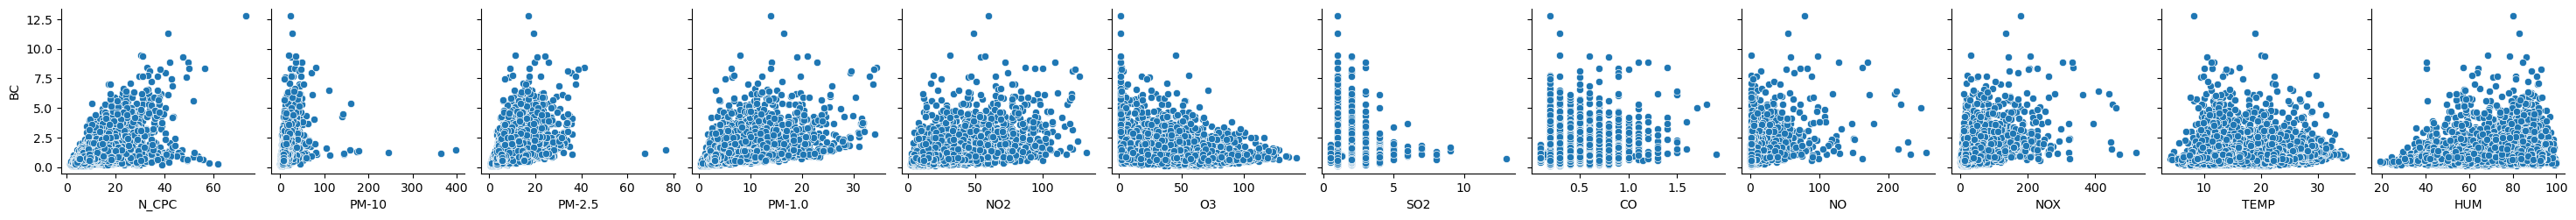

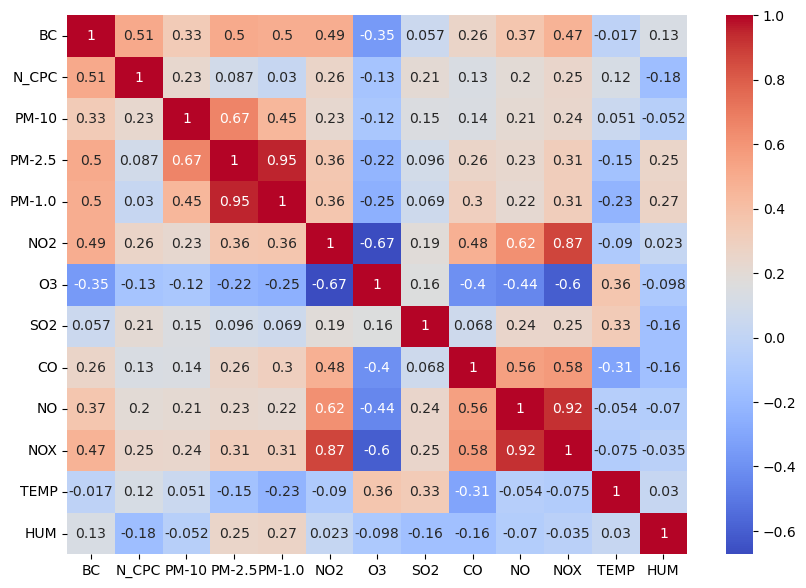

In [7]:
# Scatter plots
sns.pairplot(data, x_vars=data.columns[1:], y_vars=['BC'])

# Heat map
plt.figure(figsize=(10, 7))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.show()

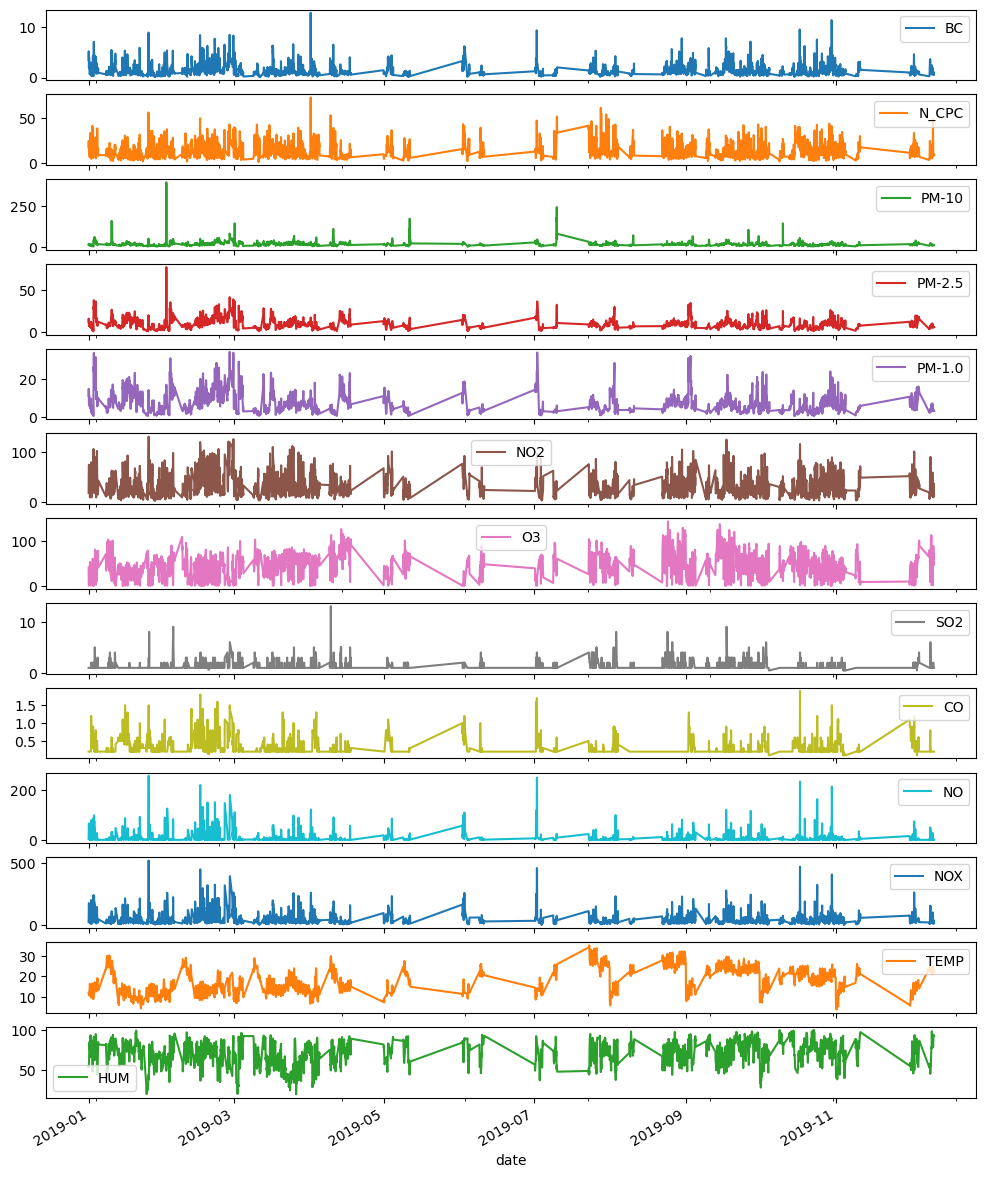

In [10]:
# Plot the time series data
data.plot(subplots=True, figsize=(12, 16))
plt.show()

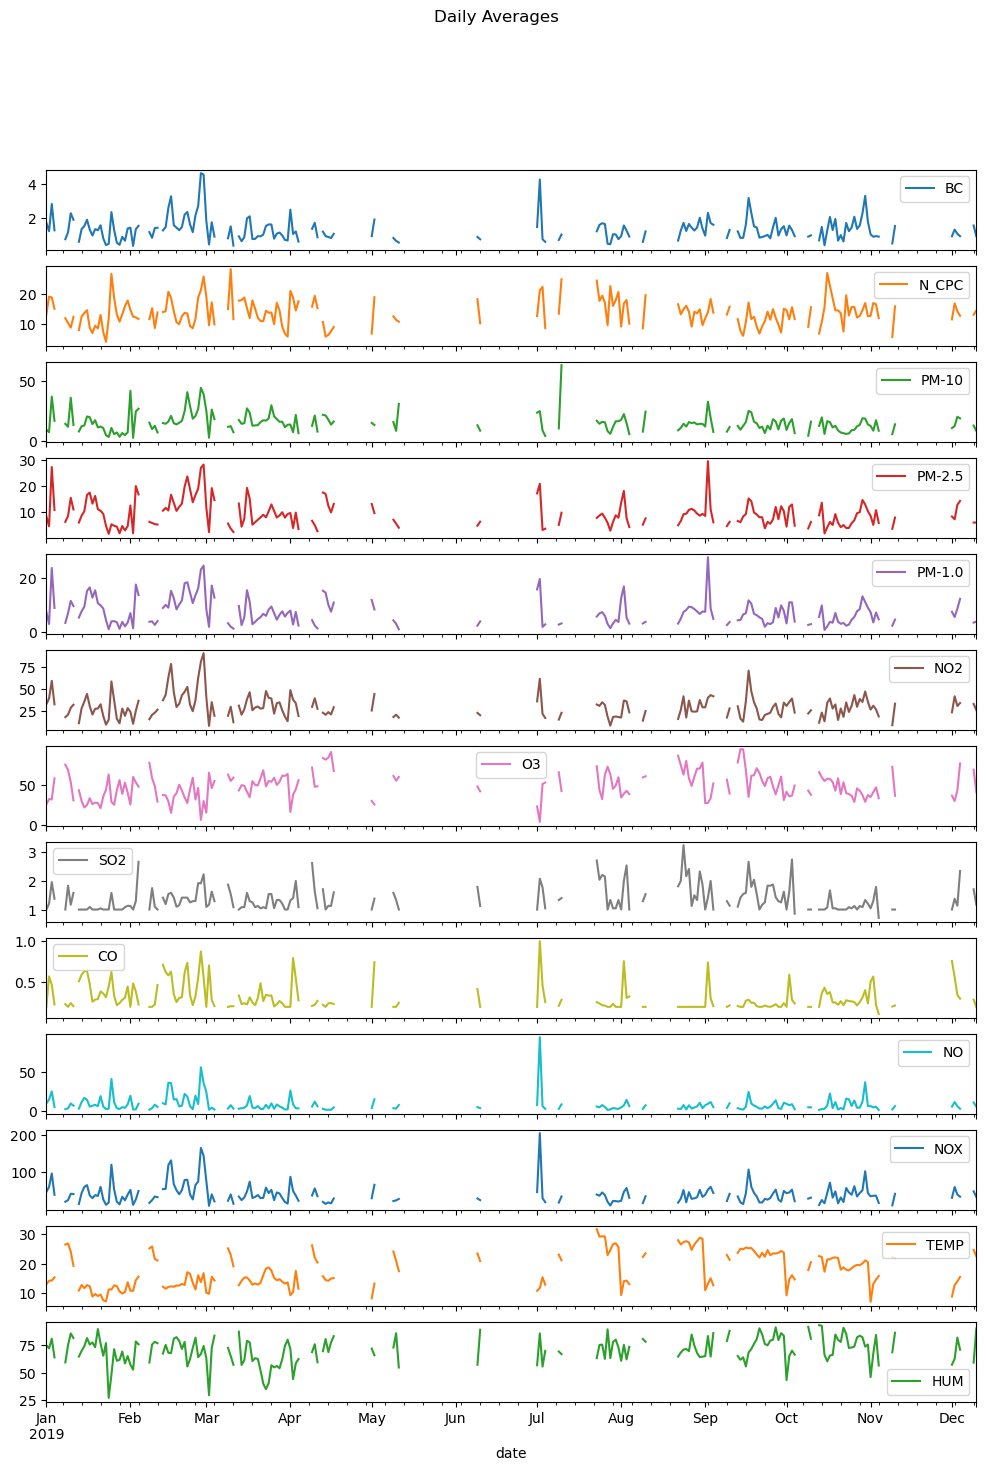

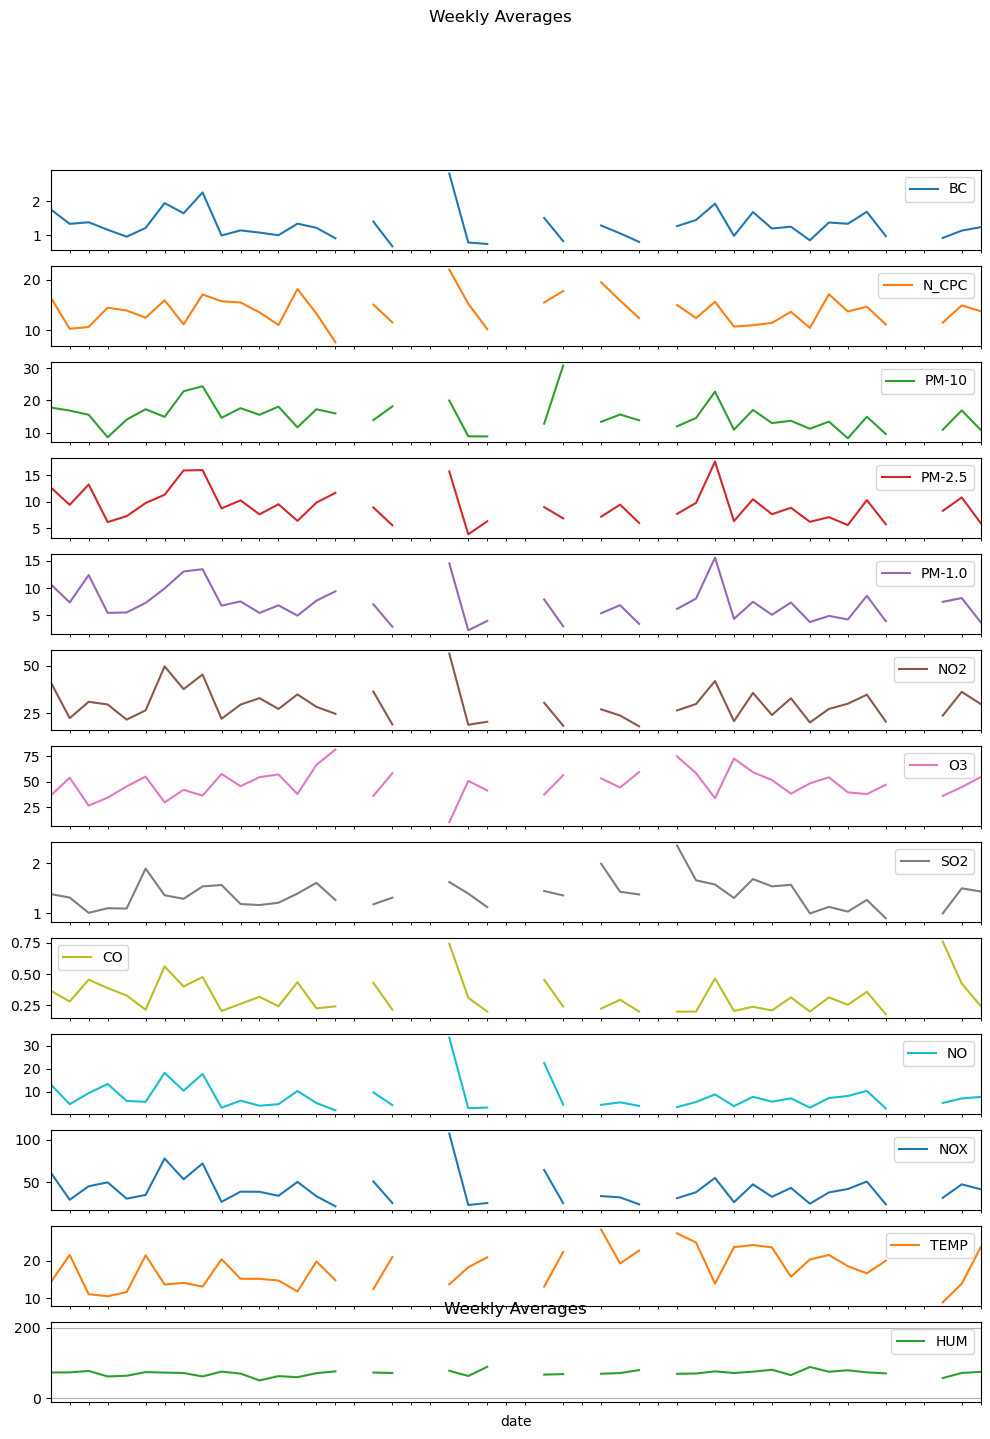

In [11]:
# Daily averages
daily_data = data.resample('D').mean()

# Weekly averages
weekly_data = data.resample('W').mean()

# Visualize the daily and weekly trends using line charts
daily_data.plot(subplots=True, figsize=(12, 16), title='Daily Averages')
weekly_data.plot(subplots=True, figsize=(12, 16), title='Weekly Averages')

# Visualize the daily and weekly trends using box plots
daily_data.boxplot(figsize=(12, 7))
plt.title('Daily Averages')
weekly_data.boxplot(figsize=(12, 7))
plt.title('Weekly Averages')

plt.show()